# PlaiCraft DSCI 100 Individual Planning

In this individual planning, I will be analyzing and visualizing data submitted by Frank Wood's Computer Science research group to prepare for the group aspect of the project where we will answer an agreed upon predictive question. First, I will be loading in the tidyverse, ggplot2, and lubridate R package to use for later.

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
set.seed(9999)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Inspecting the Datasets

Firstly, let's read in the two datasets and inspect what data we have to work with.

In [2]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set:

The data in the "players.csv" file provided for PlaiCraft has 7 variables and 196 observations as listed at the top of the data table (196x7). The variables, their data type, and description of what they represent are listed below:
1. `experience`: *chr (character)* - determines the "level" of the players' gaming experience as a Beginner, Amateur, Veteran, or Pro (the most experienced)
2. `subscribe`: *lgl (logical)* - indicated with TRUE for "yes" or FALSE for "no", determining whether or not the player is subscribed to PlaiCraft
3. `hashedemail`: *chr (character)* - email address of player, but in hashed form with a sequence of letters and numbers
4. `played_hours`: *dbl (decimal)* - how many hours the player played PlaiCraft for (assuming over a few days)
5. `name`: *chr (character)* - first name of player
6. `gender`: *chr (character)* - gender of player
7. `age`: *dbl (decimal)* - age of player


One issue seen is that it is unclear over how many days this report has been collecting the data for. There is no indication and no metadata of how long these hours_played were collected for. I also see another issue with the subscribe column. I assume this column is based on subscription of the game, as in who signed their email up for to play PlaiCraft and who is playing as a guest. However, it is unclear whether this is the case or not or if the subscription is for another thing related to the game.

Now let's read in the next dataset:

In [3]:
sessions_data <- read_csv("data/sessions.csv")
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set:
The data in the "sessions.csv" file provided for PlaiCraft has 5 variables and 1535 observations as indicated by the top of the data table (1535x5). The variables, their data type, and description of what they represent are listed below: 
1. `hashedemail`: *chr (character)* - the players' email, but in hashed form
2. `start_time`: *chr (character)* - start time of players' gametime session in "mm/dd/yyyy" and "time (in 24 hour interval)"
4. `end_time`: *chr (character)* - end time of players' gametime session in "mm/dd/yyyy" and "time (in 24 hour interval)"
5. `original_start_time`: *dbl (decimal)* - players' start time in numerical form
6. `original_end_time`: *dbl (decimal)* - players' end time in numerical form


One issue seen is that it is difficult at first to determine what is meant by the original_start_time and original_end_time. Especially with the large values given, there is no extra information given about what these values specify and how they connect to the original_start_time and original_end_time. With this, the original_start_time and original_end_time column values are in a format that we won't be able to use effectively for analysis. Thus, we will have to perform some wrangling.

### 2. The Question
Now that we have taken a view at our data. Let's state the question.

The broad question I will be addressing for this planning is question #3: "We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability." 

With this, the specific predictive question I formulated is: 
##### Can players' start time predict how many simultaneous players will be online so that we can determine if we have enough licenses to go out at any hour of the day?

### 3. Exploratory Data Analysis and Visualization
It was demonstrated above that the data can be loaded into R, so now we will tidy up the data. Tidy data follows the format of one variable per column, one observation per row, and one value in each cell. The "players.csv" follows these rules, so let's tidy up the "sessions.csv". I will transform the start_time and end_time columns to be a decimal type instead of character so that I can use it for visualizations later. I will also add an extra two columns for the start_time and end_time in hours as integers for later analysis. All of this pre wrangling will make the creation of visualizations more efficient.

In [33]:
sessions_data_tidy <- separate(sessions_data, 
                                end_time, 
                                into = c("date", "end_time"),
                                sep = " ") |>
                      separate(start_time,
                                into = c("date", "start_time"),
                                sep = " ") |>
                       mutate(start_time = as.numeric(hm(start_time))/3600) |>
                       mutate(end_time = as.numeric(hm(end_time))/3600) |>
                       mutate(start_time_hr = as.integer(start_time)) |>
                       mutate(end_time_hr = as.integer(end_time))
sessions_data_tidy

hashedEmail,date,start_time,end_time,original_start_time,original_end_time,start_time_hr,end_time_hr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18.2000000,18.400000,1.71977e+12,1.71977e+12,18,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23.5500000,23.766667,1.71867e+12,1.71867e+12,23,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17.5666667,17.950000,1.72193e+12,1.72193e+12,17,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,3.3666667,3.966667,1.72188e+12,1.72188e+12,3,3
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16.0166667,16.200000,1.71665e+12,1.71665e+12,16,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15.1333333,17.166667,1.71916e+12,1.71916e+12,15,17
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,7.2000000,7.350000,1.71317e+12,1.71317e+12,7,7
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,2.2166667,2.500000,1.72688e+12,1.72689e+12,2,2
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,2.5166667,2.816667,1.71894e+12,1.71894e+12,2,2


Now let's compute the mean for each quantitative variable in the "players.csv" data set.

In [92]:
players_data_mean <- players_data |>
                        select(played_hours, Age) |>
                        summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
players_data_mean                        

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Next, let's create some exploratory visualizations to understand the data more and possibly seek out any helpful relationships. Visualizations make it much easier to interpret datasets and make large datasets into concise figures.

#### Visualization #1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


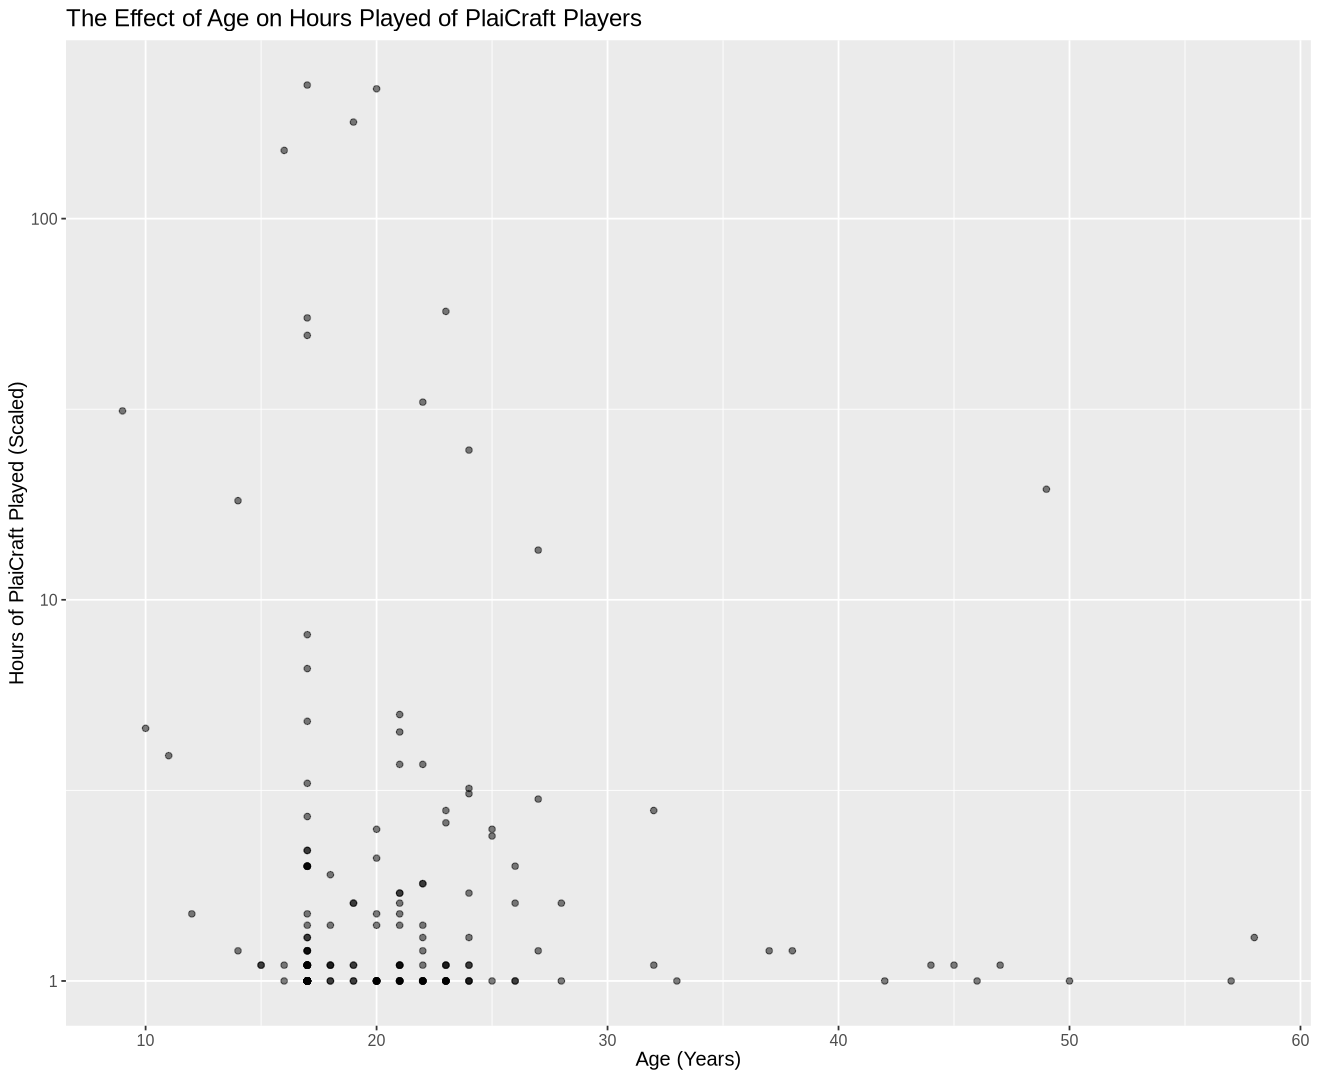

In [91]:
options(repr.plot.width = 11, repr.plot.height = 9)
played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours + 1)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Age (Years)", y = "Hours of PlaiCraft Played (Scaled)") +
                            ggtitle("The Effect of Age on Hours Played of PlaiCraft Players") +
                            scale_y_log10() +
                            theme(text = element_text(size = 12))
played_hours_age_plot

In this visualization, there doesn't seem to be any relationship between the age of the players and the hours of PlaiCraft played. The points are pretty condensed near the bottom of the graph, with some outliers near the top half. The graph does seem to insinuate that teens and young adults tend to play for a greater amount of hours, specifically ages of around 18 - 20 years old. This is not only seen by the outliers, but nearby the condensed area as well.

#### Visualization #2

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

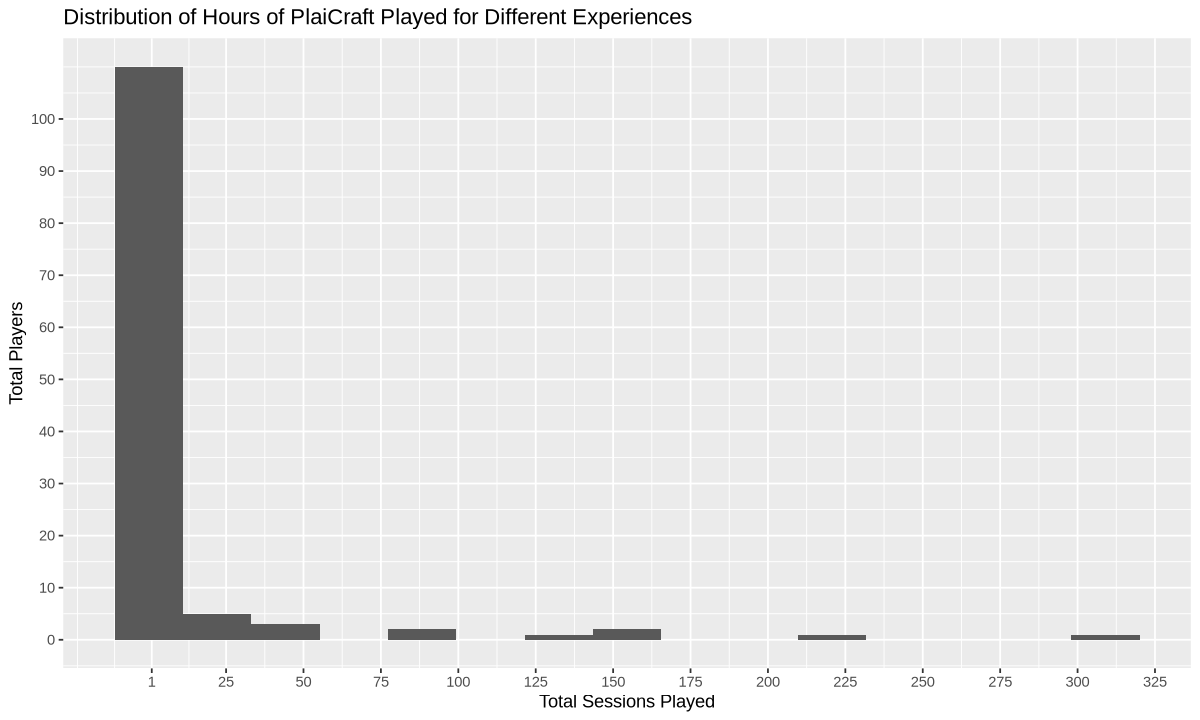

In [113]:
options(repr.plot.width = 10, repr.plot.height = 6)
total_sessions <- group_by(sessions_data, hashedEmail) |>
                    summarize(count = n())

experience_hours_histogram <- ggplot(total_sessions, aes(x = count)) +
    geom_histogram(bins = 15) +
    labs(x = "Total Sessions Played", y = "Total Players") +
    ggtitle("Distribution of Hours of PlaiCraft Played for Different Experiences") +
    scale_x_continuous(breaks = c(1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325)) +
    scale_y_continuous(breaks = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100))
    theme(text = element_text(size = 15))
experience_hours_histogram

#### Visualization #2

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


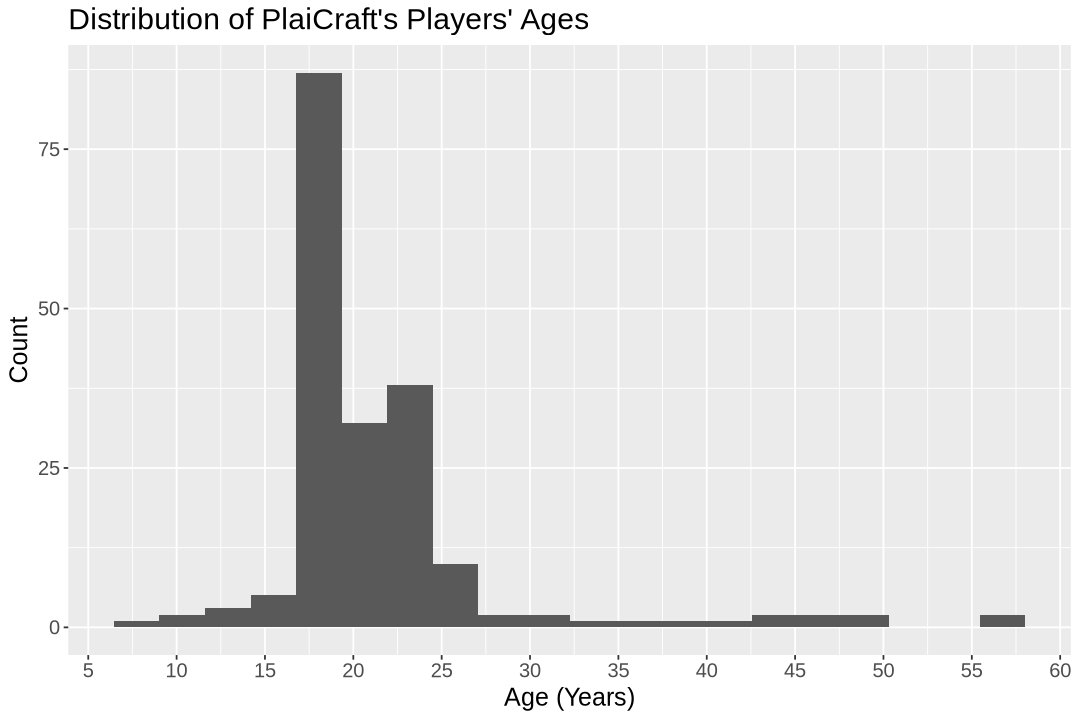

In [11]:
options(repr.plot.width = 9, repr.plot.height = 6)
age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram(bins = 20) +
                    labs(x = "Age (Years)", y = "Count") +
                    ggtitle("Distribution of PlaiCraft's Players' Ages") +
                    scale_x_continuous(breaks = c(0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75)) +
                    theme(text = element_text(size = 15))
age_histogram

In this visualization, we can see that the highest number of PlaiCraft players in the dataset are approximately 16 years old. A lot of the players' ages are condensed around the teenager to young adult ages of 16 - 25. There are however, a few beyond this at the young children, adult and senior ages.

#### Visualization #4

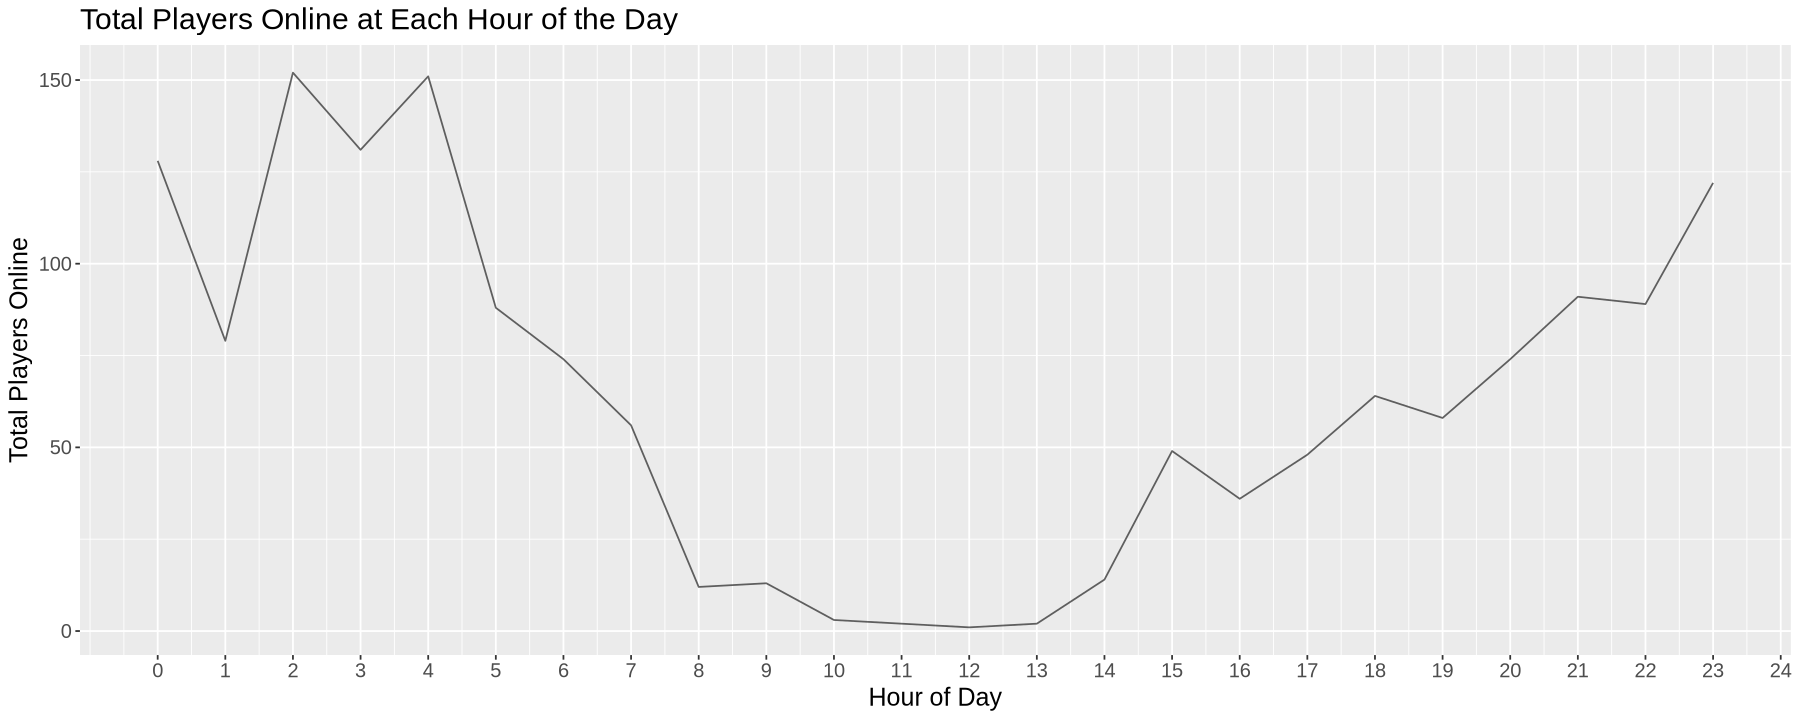

In [7]:
options(repr.plot.width = 15, repr.plot.height = 6)
start_time_players_total <- group_by(sessions_data_tidy, start_time_hr) |>
                                summarize(total_players = n())

start_time_players_line <- ggplot(start_time_players_total, aes(x = start_time_hr, y = total_players)) +
                                geom_line(alpha= 0.6) +
                                scale_x_continuous(breaks = seq(0, 24)) +
                                labs(x = "Hour of Day", y = "Total Players Online") +
                                ggtitle("Total Players Online at Each Hour of the Day") +
                                theme(text = element_text(size = 15))
start_time_players_line

This visualization is the most helpful for our specific question. It is just a rough estimate of how many players are online at a certain hour as I converted the time of day values to integers. So, it may not be the exact amount of players, but it should be relatively close. We can see that from 2 - 5am, there are the most number of players online on PlaiCraft. The number of players online is the lowest between 8am-2pm, and increases again from 3pm to the end of the day. I can connect these observations to the visualization above in that I can assume that young adults are most likely in class or working. It makes sense why visualization #2 increases from 3pm to the end of the day all the way to 5am the next day because a lot of workers and students who are young adults get their free time late at night.

#### Visualization #5

The following graphs provide information that is not as important for my specific question, but it is worth while to create these visualizations to further understand and explore both datasets as a whole. It may be needed for when I come together with my group as well.

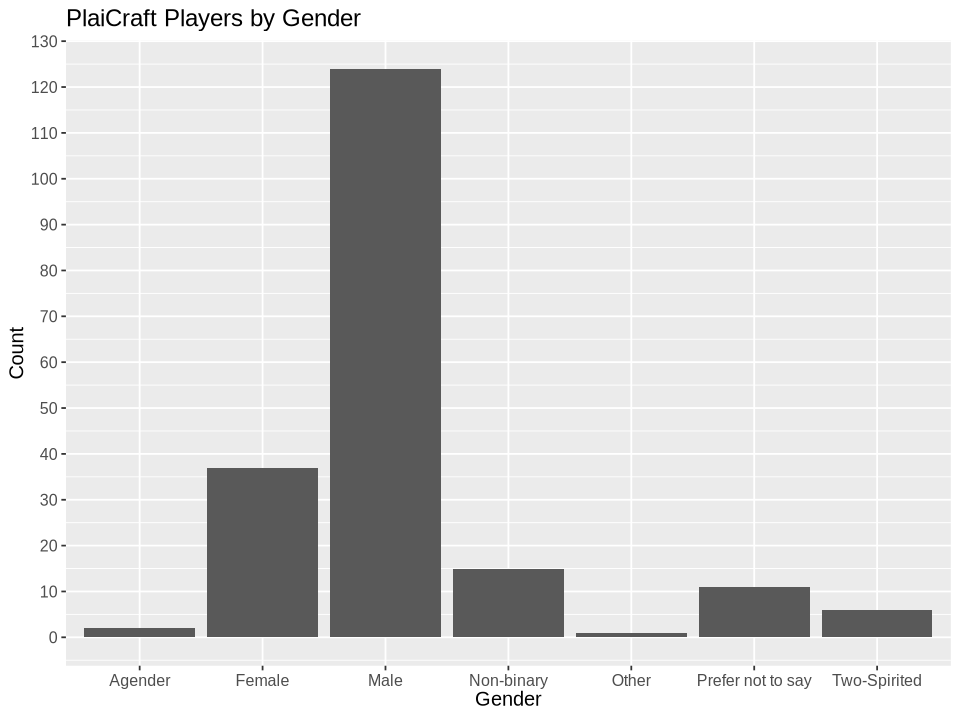

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6)
gender_data <- players_data |>
                group_by(gender) |>
                summarize(total_gender = n())
gender_bar <- ggplot(gender_data, aes(x = gender, y = total_gender)) +
                geom_bar(stat = "identity") +
                labs(x = "Gender", y = "Count") +
                ggtitle("PlaiCraft Players by Gender") +
                scale_y_continuous(breaks = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130)) +
                theme(text = element_text(size = 12))
gender_bar

In this visualization, we can see that the majority of PlaiCraft players identify as male, with female coming in second, and non-binary coming in third.

#### Visualization #6

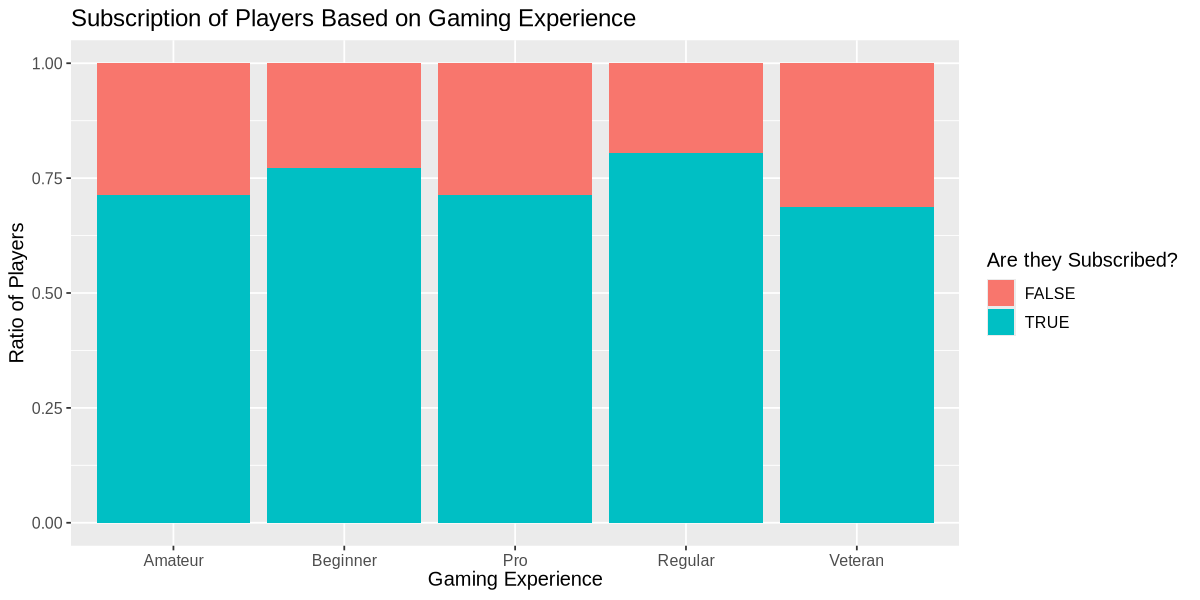

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
experience_subscribe_bar <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
                                geom_bar(position = "fill") +
                                labs(x = "Gaming Experience", y = "Ratio of Players", fill = "Are they Subscribed?") +
                                ggtitle("Subscription of Players Based on Gaming Experience") +
                                theme(text= element_text(size = 12))
experience_subscribe_bar

In this visualization, it seems like regular players are most likely to subscribe to PlaiCraft compared to the other gaming experiences. Although, across all gaming experiences, there are similar proportions of subscribed and not subscribed.

### 4. Methods and Plans

The method I would use to address my question of interest is a predictive method, specifically, non-linear regression. I will be working on the sessions.csv dataset as it contains all the variables I need in order to analyze and answer my question. I can use the start_time values and wrangle the data set to achieve the total number of players online at intervals of the day; similar to visualization #2 above. My question is more dependent on time of sessions and how many players are playing. Thus, the players.csv dataset does not contain any variables that will effectively aid my analysis.

The model chosen is appropriate because one, I am looking to predict a numerical value, which compared to classification, would not be able to do. Two, with basing my classifer off of the explanatory variable of "time of day" and response variable of "number of players online", I would be able to efficiently input any hour of the day and collect the average output that the classifier computed based on the closest *k* I choose and previous data of how many players are expected to be online. I can then decide myself if the number of players online is exceeding the number of licenses I currently have at hand for that time of day and decide what the best course of action is for the licenses.

Fortunately, the non-linear regression model does not require much assumptions compared to the linear one where it assumes that the data is linear. A reason for its minimal assumptions is due to its nearest neighbours system.

The weaknesses of the method selected are that. Fortunately, this dataset is not too large so far, so it will not take long to compute an average outcome. However, it can become a problem for when I want to add a lot more data in to get a more accurate outcome.

To process the data, I will first split the dataset into a training and testing set using the function *initial_split* and then *training* and *testing*. The proportions would be 75% training and 25% testing.
Next, I will use cross-validation on the training set to choose an appropriate *k* value. I will use the *nearest_neighbor* function with the arguments of "rectangular" weight_func and "tune()" for neighbors. The engine and mode will be "kknn" and "regression" respectively. Furthermore, I will create a recipe using the *recipe* function. My response variable will be the count of players online and the explanatory variable will be the time of day. The data argument will be the training set. I will scale and center all predictors so that the variables are on a comparable scale and none will overtake another. This is especially important for a KNN classifer system.
The cross-validation comes next. It is recommended to use 5 - 10 folds, so I will go with 5. I will use the *vfold_cv* function with the arguments of 5 folds and the count of players online being the strata. Likewise, I will create a workflow with the recipe and model I created.
I will then make check the a tibble that will contain the range of *k* values from 1 to () by (). Additionally, I will use *tune_grid* with the arguments of my cross validation set as the resamples and grid as my tibble. Then, I will use *collect_metrics*, filter for "rmse" and use *slice_min* for the mean to get the most optimal *k*.
Testing comes next. I will repeat the steps to make the model, but change "tune()" for the optimal *k*. I will create a workflow with the same recipe, new model, and fit the data into the training set. Then, I can use *predict* on the testing data that was split beforehand. Use *bind_cols* to attach that prediction column to the testing data and then see the metrics with the arguments of truth being total count of players online and estimate being ".pred".



### References

Wickham, Hadley, and Garrett Grolemund. 2016. R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O’Reilly. https://r4ds.had.co.nz/.